# **SW08: Random forests**

Random forests are an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting. Each tree in a random forest is trained on a random subset of the data (using bootstrapping) and only a random subset of features at each split, which introduces variety among the trees. During prediction, the random forest aggregates the output of all trees, either by majority voting (for classification) or averaging (for regression). This approach makes random forests robust, accurate, and less prone to overfitting compared to individual decision trees.

In this tutorial, we will once more use the iris dataset to classify the different species of iris flowers.

---

## **Setup**



In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.datasets import load_iris

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Adjust the default settings for plots
import sys
sys.path.append("..")
import ml
ml.setup_plotting()

In [2]:
# Load the iris dataset
data = load_iris(as_frame=True)
X = data.data
y = data.target

display(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


---

## **Basic example**

Let's apply a random forest directly to predict how it performs on the iris dataset.

The relevant scikit-learn classes are 
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 
and 
[RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(
    n_estimators=100,       # Number of decision trees (size of ensemble)
    max_depth=None,         # Depth of each tree (None means "unlimited")
    random_state=0,         # Random seed for reproducibility
    criterion='gini',       # How to measure the quality of a split
    min_samples_split=2,    # Number of samples required to split a node
)
clf.fit(X, y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

print("Accuracy: {:.2f}".format(accuracy_score(y, y_pred)))

Accuracy: 1.00


In [ ]:
########################
###    EXERCISE 1    ###
########################

# Part 1:
# -------
# Play around with the parameters of the RandomForestClassifier. What happens
# if you increase the number of trees? What happens if you increase the depth
# of the trees?

#if i increase the number of trees nothing is happening. The accuracy is at 100 %.
#increasing the depth of the trees doesn't change anything either in the accuracy output. 

# Part 2:
# -------
# Remember: It is recommended to assess the model's performance on a separate
# test set, rather than the training set. Can you update the code such that it 
# uses a train-test split?

**siehe Lösungen**

---

## **Feature importance**

Feature importance in random forests is a measure of how valuable each feature is in predicting the target outcome. Random forests calculate feature importance by evaluating how much each feature contributes to the model's accuracy, typically based on how often a feature is used to split nodes across all trees and the quality of these splits. Features that consistently improve prediction accuracy or reduce node impurity (e.g., Gini impurity or entropy) are assigned higher importance scores. This helps identify which features are most influential in the model, providing insights into the underlying patterns in the data.

We can easily extract the feature importances from a trained random forest
classifier by looking at the attribute `feature_importances_`. We can then
visualize the importances in a bar plot.

In [17]:
########################
###    EXERCISE 2    ###
########################

# Train a random forest classifier on the entire iris dataset. Then,
# visualize the feature importances using a bar plot. Which feature(s) 
# are the most important according to the random forest?

# Train a random forest classifier with the best hyperparameters
clf = RandomForestClassifier(n_estimators=100, 
                             max_depth=4, 
                             random_state=0)
...

Ellipsis

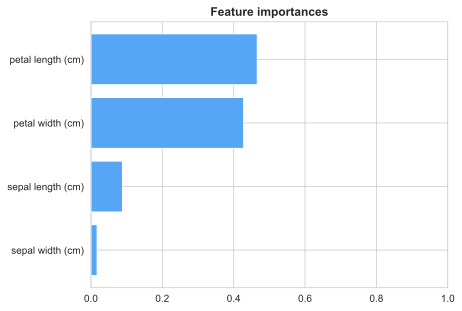

In [18]:
#Train a random forest classifier with the best hyperparameters
clf = RandomForestClassifier(n_estimators=100, 
                             max_depth=4, 
                             random_state=0)
clf.fit(X, y)

# Extract the importance of the features
importances = clf.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances
fig, ax = plt.subplots()
ax.barh(range(X.shape[1]), importances[indices])
ax.set_yticks(range(X.shape[1]))
ax.set_yticklabels(X.columns[indices])
ax.set_title("Feature importances", fontweight="bold")
ax.set_xlim(0,1);

# Discussion:
# - The feature importances indicate how important each feature is for the
#   random forest classifier. The importances are normalized such that they
#   sum up to 1.
# - In our dataset, the petal length and petal width are the most important
#   features for the random forest classifier...

---

## **Decision boundaries**

In a previous tutorial (on decision trees), we have used the function 
plot_decision_boundary() to visualize the decision boundary of a classifier 
using two features. Let's use this function again to visualize the decision
boundary, this time of a kNN classifier. For visualization purposes, we will
only use the first two features of the iris dataset.


```python
def plot_decision_boundary(clf, X, y, 
                          n_steps=1000, 
                          data=None, 
                          ax=None):
    """
    Visualize the decision boundary of an arbitrary classifier.

    clf:  The classifier to plot.
    X:    The features of the dataset.
    y:    The labels of the dataset.
    n_steps: Parameter controlling the resolution of plot.
    ax:   (optional) The axis to plot on. If None, a new figure is created.
    data: (optional) Data structure provided by sklearn.datasets.load_iris().
    """
    ...
```

In [19]:
from ml import plot_decision_boundary

# Note: Choose your own two features here... According to the feature
# importances reported above, the separation is best for petal length and
# petal width. (We pick here the more difficult case, to see that a random
# forest is able to learn relatively complex decision boundaries.)
features = ["sepal length (cm)", "sepal width (cm)"]
X_2d = X[features]

In [ ]:
########################
###    EXERCISE 3    ###
########################

# Use the function plot_decision_boundary() to look how the decision boundary
# changes when using different configurations of the RandomForestClassifier.
# Just play around with the parameters and see what happens.


max_depth = 1:  0.711
max_depth = 3:  0.711
max_depth = 5:  0.684
max_depth = None:  0.658


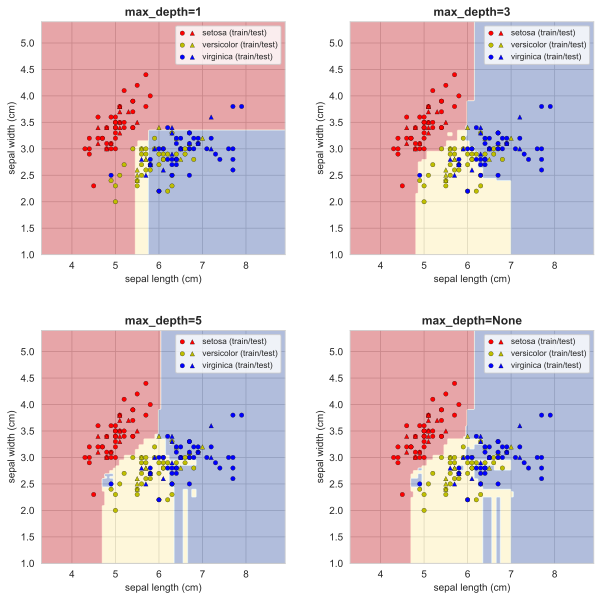

In [20]:


# With the stratify parameter in train_test_split, we ensure that the
# distribution of classes is the same in the training and test set.
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, 
                                                    random_state=0, 
                                                    stratify=y)



fig, axes = plt.subplots(2, 2, figsize=(9, 9))
axes = axes.flatten()
for i, max_depth in enumerate([1, 3, 5, None]):
    clf = RandomForestClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    acc_test = accuracy_score(y_test, clf.predict(X_test))
    print(f"max_depth = {max_depth}:  {acc_test:.3f}")
    ml.plot_decision_boundary(clf, 
                              X=X_train, y=y_train,
                              X_test=X_test, y_test=y_test, 
                              n_steps=200,  # If too slow, reduce this number
                              data=data, 
                              ax=axes[i])
    axes[i].set_title(f"max_depth={max_depth}", fontweight="bold")
plt.tight_layout(pad=3.0)


# - The decision boundary changes depending on the hyperparameters.
# - The depth of the trees is an important hyperparameter that controls the
#   complexity of the decision boundary. A small depth leads to a simple
#   decision boundary, while a large depth leads to a more complex boundary.
# - The decision boundary is more complex for max_depth=None, which means
#   that the trees are grown until all leaves are pure. This leads to a 
#   complex decision boundary that can potentially overfit the training data.